# Final Project Report

* Class: DS 5100
* Student Name: Shelly Schwartz
* Student Net ID: tfk6ua@virginia.edu
* This URL: a URL to the notebook source of this document

# Instructions

Follow the instructions in the Final Project isntructions notebook and put evidence of your work in this notebook.

Total points for each subsection under **Deliverables** and **Scenarios** are given in parentheses.

Breakdowns of points within subsections are specified within subsection instructions as bulleted lists.

This project is worth **50 points**.

# Deliverables

## The Monte Carlo Module (10)

- URL included, appropriately named (1).
- Includes all three specified classes (3).
- Includes at least all 12 specified methods (6; .5 each).

Put the URL to your GitHub repo here.

Repo URL:

Paste a copyy of your module here.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks. 

```
import numpy as np
import pandas as pd


class Die:
    """
    represents a single die, allowing for customizable faces and weights
    """

    def __init__(self, faces):
        """
        sets up a die with the given faces and default weights for each face.
        the weights are set to 1.0 initially.

        arguments:
            faces: a numpy array containing unique face symbols, which can be numbers or strings

        errors:
            raises typeerror if the faces input is not a numpy array
            raises valueerror if there are duplicate face values
        """
        if not isinstance(faces, np.ndarray):
            raise TypeError("faces must be provided as a numpy array")

        if len(set(faces)) != len(faces):
            raise ValueError("all faces must be unique")

        self.faces = faces
        self.weights = np.ones(len(faces), dtype=float)
        # create a dataframe to store faces and their weights
        self.die_state = pd.DataFrame({'Faces': self.faces, 'Weights': self.weights})
        self.die_state.set_index('Faces', inplace=True)

    def change_weight(self, face, new_weight):
        """
        updates the weight of a specified face.

        arguments:
            face: the face whose weight is being updated
            new_weight: the new weight value, which should be numeric (int or float)

        errors:
            raises indexerror if the face is not part of the die
            raises typeerror if the weight is not a valid numeric type
        """
        if face not in self.die_state.index:
            raise IndexError("the face does not exist in this die")

        try:
            new_weight = float(new_weight)
        except ValueError:
            raise TypeError("weight must be a number")

        # assign the new weight to the specified face
        self.die_state.loc[face, 'Weights'] = new_weight

    def roll(self, num_rolls=1):
        """
        rolls the die the specified number of times and returns the results.

        arguments:
            num_rolls: how many times to roll the die. defaults to 1.

        returns:
            a list of face values based on the roll results
        """
        outcomes = self.die_state.sample(
            n=num_rolls,
            weights=self.die_state['Weights'],
            replace=True
        )
        return list(outcomes.index)

    def get_state(self):
        """
        shows the current state of the die, including faces and weights

        returns:
            a dataframe copy with faces and their associated weights
        """
        return self.die_state.copy()



class Game:
    """
    handles rolling multiple dice together, simulating a game
    """

    def __init__(self, dice):
        """
        sets up the game with a collection of dice

        arguments:
            dice: a list containing multiple die objects
        """
        self.dice = dice
        self.results = None

    def play(self, num_rolls):
        """
        rolls all dice in the game a specified number of times

        arguments:
            num_rolls: how many times each die should be rolled

        stores:
            the results in a private dataframe in wide format, where rows
            represent roll numbers and columns represent dice
        """
        roll_results = {}
        for i, die in enumerate(self.dice):
            roll_results[i] = die.roll(num_rolls)
        self.results = pd.DataFrame(roll_results)

    def get_recent_play(self, form='wide'):
        """
        retrieves the results of the most recent play

        arguments:
            form: the format of the output, either 'wide' (default) or 'narrow'

        returns:
            a dataframe in the specified format

        errors:
            raises valueerror if the requested format is not valid
        """
        if self.results is None:
            raise ValueError("no results to show. play the game first")

        if form == 'wide':
            return self.results.copy()
        elif form == 'narrow':
            narrow_results = self.results.melt(var_name='Die', value_name='Outcome')
            return narrow_results
        else:
            raise ValueError("invalid format. use 'wide' or 'narrow'")


class Analyzer:
    """
    provides tools for analyzing the results of a game
    """

    def __init__(self, game):
        """
        links the analyzer to a game and fetches its results

        arguments:
            game: a game object to analyze

        errors:
            raises valueerror if the input is not a game object
            raises valueerror if the game has no results to analyze
        """
        if not isinstance(game, Game):
            raise ValueError("input must be a game object")
        if game.results is None:
            raise ValueError("the game has no results to analyze")

        self.results = game.get_recent_play()

    def jackpot(self):
        """
        counts how many rolls have all dice showing the same face

        returns:
            an integer representing the number of jackpots
        """
        jackpots = 0
        for _, row in self.results.iterrows():
            if len(set(row)) == 1:
                jackpots += 1
        return jackpots

    def face_counts_per_roll(self):
        """
        calculates how often each face appears in each roll

        returns:
            a dataframe where rows are roll numbers and columns are face counts
        """
        counts = self.results.apply(pd.Series.value_counts, axis=1).fillna(0)
        return counts

    def combo_count(self):
        """
        calculates unique combinations of faces rolled, ignoring order

        returns:
            a dataframe with combinations and their frequencies
        """
        combinations = self.results.apply(lambda row: tuple(sorted(row)), axis=1)
        combo_counts = combinations.value_counts()
        combo_df = pd.DataFrame({'Combination': combo_counts.index, 'Frequency': combo_counts.values})
        return combo_df

    def permutation_count(self):
        """
        calculates unique permutations of faces rolled, considering order

        returns:
            a dataframe with permutations and their frequencies
        """
        permutations = self.results.apply(tuple, axis=1)
        permutation_counts = permutations.value_counts()
        permutation_df = pd.DataFrame({'Permutation': permutation_counts.index, 'Frequency': permutation_counts.values})
        return permutation_df
```

## Unitest Module (2)

Paste a copy of your test module below.

NOTE: Paste as text, not as code. Use triple backticks to wrap your code blocks.

- All methods have at least one test method (1).
- Each method employs one of Unittest's Assert methods (1).

```
import unittest
import numpy as np
import pandas as pd
from package_folder.package.montecarlo import Die, Analyzer, Game


class TestDie(unittest.TestCase):
    """
    tests for the die class
    """

    def setUp(self):
        # create a die with faces 1 to 6
        self.die = Die(np.array([1, 2, 3, 4, 5, 6]))

    def test_init(self):
        # test that the die is initialized correctly
        self.assertEqual(len(self.die.faces), 6)
        self.assertTrue(all(weight == 1.0 for weight in self.die.weights))
        # test error when duplicate faces are provided
        with self.assertRaises(ValueError):
            Die(np.array([1, 2, 2, 3]))

    def test_change_weight(self):
        # test changing the weight of a face
        self.die.change_weight(3, 5.0)
        self.assertEqual(self.die.die_state.loc[3, 'Weights'], 5.0)
        # test another face
        self.die.change_weight(1, 2.0)
        self.assertEqual(self.die.die_state.loc[1, 'Weights'], 2.0)
        # test invalid face
        with self.assertRaises(IndexError):
            self.die.change_weight(7, 2.0)
        # test invalid weight type
        with self.assertRaises(TypeError):
            self.die.change_weight(3, "invalid")

    def test_roll(self):
        # test rolling the die
        rolls = self.die.roll(10)
        self.assertEqual(len(rolls), 10)
        self.assertTrue(all(face in self.die.faces for face in rolls))
        # make one face heavily weighted and test rolls
        self.die.change_weight(6, 10)
        weighted_rolls = self.die.roll(100)
        self.assertGreater(weighted_rolls.count(6), 50)  # most rolls should be 6

    def test_get_state(self):
        # test getting the current state of the die
        state = self.die.get_state()
        self.assertIsInstance(state, pd.DataFrame)
        self.assertEqual(len(state), 6)


class TestGame(unittest.TestCase):
    """
    tests for the game class
    """

    def setUp(self):
        # create a game with two dice
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([4, 5, 6]))
        self.game = Game([die1, die2])

    def test_init(self):
        # test that the game initializes correctly with dice
        self.assertEqual(len(self.game.dice), 2)

    def test_play(self):
        # test playing the game
        self.game.play(10)
        self.assertEqual(len(self.game.results), 10)
        # validate specific outcomes
        die1 = Die(np.array([1, 2]))
        die1.change_weight(2, 5)
        game = Game([die1])
        game.play(20)
        results = game.get_recent_play('wide')
        self.assertGreater(len(results[0][results[0] == 2]), 10)  # more rolls should show face 2

    def test_get_recent_play(self):
        # test getting play results in wide format
        self.game.play(5)
        wide_results = self.game.get_recent_play('wide')
        self.assertIsInstance(wide_results, pd.DataFrame)
        self.assertEqual(wide_results.shape[0], 5)
        # test narrow format
        narrow_results = self.game.get_recent_play('narrow')
        self.assertIsInstance(narrow_results, pd.DataFrame)
        self.assertGreater(narrow_results.shape[0], 5)
        # test invalid format
        with self.assertRaises(ValueError):
            self.game.get_recent_play('invalid')


class TestAnalyzer(unittest.TestCase):
    """
    tests for the analyzer class
    """

    def setUp(self):
        # create a game and analyzer
        die1 = Die(np.array([1, 2, 3]))
        die2 = Die(np.array([1, 2, 3]))
        game = Game([die1, die2])
        game.play(10)
        self.analyzer = Analyzer(game)

    def test_init(self):
        # test analyzer initialization
        self.assertIsInstance(self.analyzer.results, pd.DataFrame)
        self.assertEqual(len(self.analyzer.results), 10)
        # test invalid initialization
        with self.assertRaises(ValueError):
            Analyzer("invalid_game")

    def test_jackpot(self):
        mock_results = pd.DataFrame({
            0: [1, 1, 1, 1, 1],  # Die 1 results
            1: [1, 1, 1, 1, 1],  # Die 2 results
        })
        self.analyzer.results = mock_results  # Override self.results

        # Expected jackpot count
        expected_jackpots = 5

        # Call the jackpot method and verify the result
        actual_jackpots = self.analyzer.jackpot()

        self.assertEqual(actual_jackpots, expected_jackpots)

    def test_face_counts_per_roll(self):
        counts = self.analyzer.face_counts_per_roll()
        self.assertIsInstance(counts, pd.DataFrame)
        self.assertEqual(counts.shape[0], 10)  # 10 rolls
        # test specific face counts
        self.assertTrue((counts.sum(axis=1) == 2).all())  # each roll involves 2 dice

    def test_combo_count(self):
        # Mock deterministic game results
        mock_results = pd.DataFrame({
            0: [1, 1, 2, 3, 2],  # Die 1 results
            1: [1, 2, 2, 3, 3],  # Die 2 results
        })
        self.analyzer.results = mock_results  # Override self.results

        # Expected combinations (ignoring order)
        expected_combos = {
            (1, 1): 1,  # Appears once
            (1, 2): 1,
            (2, 2): 1,
            (3, 3): 1,
            (2, 3): 1,
        }

        combos = self.analyzer.combo_count()

        for combo, freq in expected_combos.items():
            self.assertIn(combo, combos['Combination'].tolist())
            self.assertEqual(
                combos.loc[combos['Combination'] == combo, 'Frequency'].values[0],
                freq
            )

        # Ensure no unexpected combinations are present
        actual_combos = set(combos['Combination'].tolist())
        self.assertEqual(set(expected_combos.keys()), actual_combos)

    def test_permutation_count(self):

        # Mock deterministic game results
        mock_results = pd.DataFrame({
            0: [1, 1, 2, 3, 2],  # Die 1 results
            1: [1, 2, 2, 3, 3],  # Die 2 results
        })
        self.analyzer.results = mock_results  # Override self.results

        # Expected permutations (considering order)
        expected_permutations = {
            (1, 1): 1,  # Appears once
            (1, 2): 1,
            (2, 2): 1,
            (3, 3): 1,
            (2, 3): 1,
        }

        permutations = self.analyzer.permutation_count()

        for perm, freq in expected_permutations.items():
            self.assertIn(perm, permutations['Permutation'].tolist())
            self.assertEqual(
                permutations.loc[permutations['Permutation'] == perm, 'Frequency'].values[0],
                freq
            )

        # Ensure no unexpected permutations are present
        actual_permutations = set(permutations['Permutation'].tolist())
        self.assertEqual(set(expected_permutations.keys()), actual_permutations)


if __name__ == '__main__':
    unittest.main()
```

## Unittest Results (3)

Put a copy of the results of running your tests from the command line here.

Again, paste as text using triple backticks.

- All 12 specified methods return OK (3; .25 each).

## Import (1)

Import your module here. This import should refer to the code in your package directory.

- Module successuflly imported (1).

In [70]:
# e.g. import montecarlo.montecarlo 

## Help Docs (4)

Show your docstring documentation by applying `help()` to your imported module.

- All methods have a docstring (3; .25 each).
- All classes have a docstring (1; .33 each).

In [71]:
# help(montecarlo)

## `README.md` File (3)

Provide link to the README.md file of your project's repo.

- Metadata section or info present (1).
- Synopsis section showing how each class is called (1). (All must be included.)
- API section listing all classes and methods (1). (All must be included.)

URL:

## Successful installation (2)

Put a screenshot or paste a copy of a terminal session where you successfully install your module with pip.

If pasting text, use a preformatted text block to show the results.

- Installed with `pip` (1).
- Successfully installed message appears (1).

# Scenarios

Use code blocks to perform the tasks for each scenario.

Be sure the outputs are visible before submitting.

## Scenario 1: A 2-headed Coin (9)

Task 1. Create a fair coin (with faces $H$ and $T$) and one unfair coin in which one of the faces has a weight of $5$ and the others $1$.

- Fair coin created (1).
- Unfair coin created with weight as specified (1).

In [72]:
fair_coin = Die(np.array(['H', 'T']))

unfair_coin = Die(np.array(['H', 'T']))
unfair_coin.change_weight('H', 5)
unfair_coin.change_weight('T', 1)

print("Fair Coin State:")
print(fair_coin.get_state())

print("Unfair Coin State:")
print(unfair_coin.get_state())

Fair Coin State:
       Weights
Faces         
H          1.0
T          1.0
Unfair Coin State:
       Weights
Faces         
H          5.0
T          1.0


Task 2. Play a game of $1000$ flips with two fair dice.

- Play method called correclty and without error (1).

In [73]:

fair_die1 = Die(np.array(['H', 'T']))
fair_die2 = Die(np.array(['H', 'T']))

game_fair = Game([fair_die1, fair_die2])


game_fair.play(1000)

print(game_fair.get_recent_play('wide'))


     0  1
0    T  H
1    T  H
2    H  T
3    H  H
4    H  H
..  .. ..
995  T  H
996  H  T
997  H  H
998  H  T
999  H  T

[1000 rows x 2 columns]


Task 3. Play another game (using a new Game object) of $1000$ flips, this time using two unfair dice and one fair die. For the second unfair die, you can use the same die object twice in the list of dice you pass to the Game object.

- New game object created (1).
- Play method called correclty and without error (1).

In [74]:
unfair_die1 = Die(np.array(['H', 'T']))
unfair_die1.change_weight('H', 5)
unfair_die1.change_weight('T', 1)


game_mixed = Game([unfair_die1, unfair_die1, fair_die1])


game_mixed.play(1000)

print(game_mixed.get_recent_play('wide'))

     0  1  2
0    H  T  T
1    H  H  H
2    H  H  T
3    H  T  H
4    H  H  T
..  .. .. ..
995  H  H  T
996  H  H  T
997  H  H  T
998  H  H  H
999  H  H  T

[1000 rows x 3 columns]


Task 4. For each game, use an Analyzer object to determine the raw frequency of jackpots — i.e. getting either all $H$s or all $T$s.

- Analyzer objecs instantiated for both games (1).
- Raw frequencies reported for both (1).

In [75]:

analyzer_fair = Analyzer(game_fair)
analyzer_mixed = Analyzer(game_mixed)


jackpot_fair = analyzer_fair.jackpot()
jackpot_mixed = analyzer_mixed.jackpot()

print(f"raw frequency of jackpots (two fair dice): {jackpot_fair}")
print(f"raw frequency of jackpots (two unfair dice, one fair die): {jackpot_mixed}")


raw frequency of jackpots (two fair dice): 503
raw frequency of jackpots (two unfair dice, one fair die): 348


Task 5. For each analyzer, compute relative frequency as the number of jackpots over the total number of rolls.

- Both relative frequencies computed (1).

In [76]:
print(f"relative frequency of jackpots (two fair dice): {jackpot_fair/1000}")
print(f"relative frequency of jackpots (two unfair dice, one fair die): {jackpot_mixed/1000}")


relative frequency of jackpots (two fair dice): 0.503
relative frequency of jackpots (two unfair dice, one fair die): 0.348


Task 6. Show your results, comparing the two relative frequencies, in a simple bar chart.

- Bar chart plotted and correct (1).

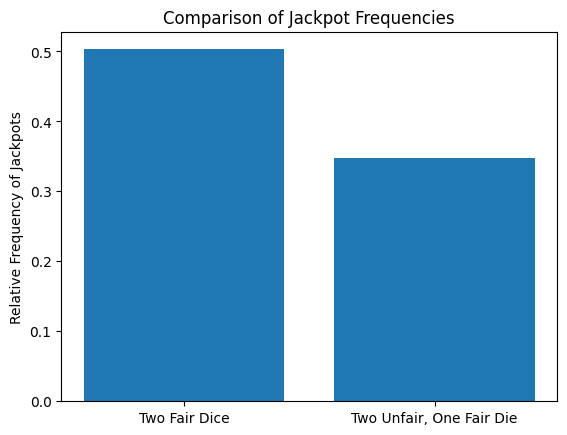

In [77]:
import matplotlib.pyplot as plt

plt.bar(['Two Fair Dice', 'Two Unfair, One Fair Die'], [jackpot_fair/1000, jackpot_mixed/1000])
plt.ylabel('Relative Frequency of Jackpots')
plt.title('Comparison of Jackpot Frequencies')
plt.show()


## Scenario 2: A 6-sided Die (9)

Task 1. Create three dice, each with six sides having the faces 1 through 6.

- Three die objects created (1).

In [67]:
die1 = Die(np.array([1, 2, 3, 4, 5, 6]))
die2 = Die(np.array([1, 2, 3, 4, 5, 6]))
die3 = Die(np.array([1, 2, 3, 4, 5, 6]))

print(die1.get_state())
print(die2.get_state())
print(die3.get_state())

       Weights
Faces         
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
       Weights
Faces         
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0
       Weights
Faces         
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0


Task 2. Convert one of the dice to an unfair one by weighting the face $6$ five times more than the other weights (i.e. it has weight of 5 and the others a weight of 1 each).

- Unfair die created with proper call to weight change method (1).

In [81]:
die1.change_weight(6, 5)
print(die1.get_state())

       Weights
Faces         
1          1.0
2          1.0
3          1.0
4          1.0
5          1.0
6          5.0


Task 3. Convert another of the dice to be unfair by weighting the face $1$ five times more than the others.

- Unfair die created with proper call to weight change method (1).

In [82]:
die2.change_weight(1, 5)
print(die2.get_state())

       Weights
Faces         
1          5.0
2          1.0
3          1.0
4          1.0
5          1.0
6          1.0


Task 4. Play a game of $10000$ rolls with $5$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [83]:
fair_dice = [Die(np.array([1, 2, 3, 4, 5, 6])) for _ in range(5)]
fair_game = Game(fair_dice)
fair_game.play(10000)
print(fair_game.get_recent_play('wide'))

      0  1  2  3  4
0     3  6  2  5  5
1     5  1  1  4  1
2     1  1  4  6  3
3     2  5  5  3  2
4     5  5  1  6  2
...  .. .. .. .. ..
9995  1  2  4  6  5
9996  2  6  5  3  5
9997  4  5  5  6  5
9998  4  2  2  6  4
9999  4  6  4  2  6

[10000 rows x 5 columns]


Task 5. Play another game of $10000$ rolls, this time with $2$ unfair dice, one as defined in steps #2 and #3 respectively, and $3$ fair dice.

- Game class properly instantiated (1). 
- Play method called properly (1).

In [86]:
mixed_dice = [die1, die2] + [Die(np.array([1, 2, 3, 4, 5, 6])) for _ in range(3)]

mixed_game = Game(mixed_dice)
mixed_game.play(10000)
print(mixed_game.get_recent_play('wide'))

      0  1  2  3  4
0     6  2  1  4  1
1     4  1  5  1  1
2     6  1  2  2  4
3     6  1  3  5  5
4     6  1  4  5  4
...  .. .. .. .. ..
9995  4  1  1  6  1
9996  1  1  2  2  5
9997  1  1  5  1  2
9998  5  5  6  4  5
9999  1  1  3  4  4

[10000 rows x 5 columns]


Task 6. For each game, use an Analyzer object to determine the relative frequency of jackpots and show your results, comparing the two relative frequencies, in a simple bar chart.

- Jackpot methods called (1).
- Graph produced (1).

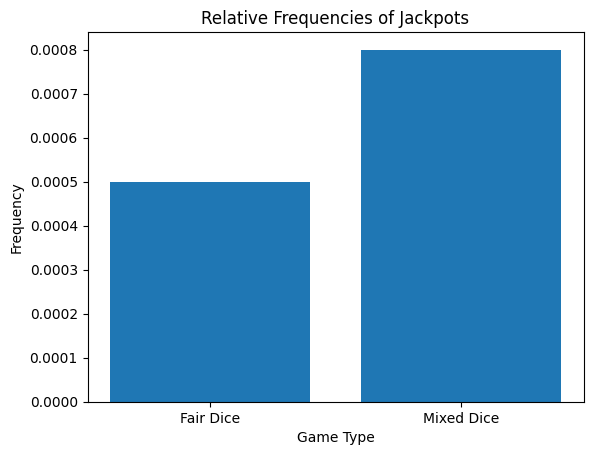

In [87]:
import matplotlib.pyplot as plt

# jackpot frequencies for the fair game
fair_analyzer = Analyzer(fair_game)
fair_jackpots = fair_analyzer.jackpot()
fair_jackpot_frequency = fair_jackpots / 10000

#jackpot frequencies for the mixed game
mixed_analyzer = Analyzer(mixed_game)
mixed_jackpots = mixed_analyzer.jackpot()
mixed_jackpot_frequency = mixed_jackpots / 10000

labels = ['Fair Dice', 'Mixed Dice']
frequencies = [fair_jackpot_frequency, mixed_jackpot_frequency]

plt.bar(labels, frequencies)
plt.title('Relative Frequencies of Jackpots')
plt.ylabel('Frequency')
plt.xlabel('Game Type')
plt.show()

## Scenario 3: Letters of the Alphabet (7)

Task 1. Create a "die" of letters from $A$ to $Z$ with weights based on their frequency of usage as found in the data file `english_letters.txt`. Use the frequencies (i.e. raw counts) as weights.

- Die correctly instantiated with source file data (1).
- Weights properly applied using weight setting method (1).

In [102]:
import pandas as pd


letter_dat = pd.read_csv("english_letters.txt", header=None, sep='\s+', names=["Letter", "Freq"])
print(letter_dat.head()) 


with open("scrabble_words.txt", "r") as file:
    scrabble_words_dat = [line.strip().upper() for line in file]


print(scrabble_words_dat[:10])

letters_die = Die(letter_dat["Letter"].values)
for i in range(len(letter_dat)):
    letters_die.change_weight(letter_dat["Letter"].iloc[i], letter_dat["Freq"].iloc[i])


  Letter       Freq
0      E  529117365
1      T  390965105
2      A  374061888
3      O  326627740
4      I  320410057
['AA', 'AAH', 'AAHED', 'AAHING', 'AAHS', 'AAL', 'AALII', 'AALIIS', 'AALS', 'AARDVARK']


<>:4: SyntaxWarning: invalid escape sequence '\s'
<>:4: SyntaxWarning: invalid escape sequence '\s'
/var/folders/71/qtpx6s7s7hjcgr3rb45grv1r0000gn/T/ipykernel_19667/393286473.py:4: SyntaxWarning: invalid escape sequence '\s'
  letter_dat = pd.read_csv("english_letters.txt", header=None, sep='\s+', names=["Letter", "Freq"])


Task 2. Play a game involving $4$ of these dice with $1000$ rolls.

- Game play method properly called (1).

In [142]:
dice_game_dat = [letters_die, letters_die, letters_die, letters_die]
game = Game(dice_game_dat)
game.play(1000)
results = game.get_recent_play('wide')

Task 3. Determine how many permutations in your results are actual English words, based on the vocabulary found in `scrabble_words.txt`.

- Use permutation method (1).
- Get count as difference between permutations and vocabulary (1).

In [143]:
analyzer = Analyzer(game)
permutations_dat = analyzer.permutation_count()
valid_words = 0
for perm in permutations_dat["Permutation"]:
    word = "".join(perm)  
    if word in scrabble_words_dat: 
        valid_words += 1  
print(len(permutations_dat))
print(valid_words)

995
48


Task 4. Repeat steps #2 and #3, this time with $5$ dice. How many actual words does this produce? Which produces more?

- Successfully repreats steps (1).
- Identifies parameter with most found words (1).

In [ ]:
dice_5 = [letters_die for _ in range(5)]
game_5 = Game(dice_5)
game_5.play(1000)
results = game_5.get_recent_play('wide')

analyzer_5 = Analyzer(game_5)
permutations_5 = analyzer_5.permutation_count()
valid_words_5 = 0
for perm in permutations_5["Permutation"]:
    word = "".join(perm)  
    if word in scrabble_words_dat: 
        valid_words_5 += 1  

print(len(permutations_5))
print(valid_words_5)

Using fewer dice (4 dice) produces more valid English words than 5 dice because shorter sequences have a higher chance of matching valid words in the Scrabble dictionary.